In [1]:
import numpy as np
import processing as pro
import plotting as plo

##### Import lines and planes data or enter in manually...

In [2]:
# assign the declination and inclination data from lines (first principal components)
v1_decs = [130, 110, 105, 145]
v1_incs = [45, 55, 47, 60]

# assign the declination and inclination data from planes (the normal to the planes; the third principal component)
v3_decs = [125.554404, 135.937199, 24.165465, 100.807007]
v3_incs = [-12.605385, -41.935241, -6.533425, -16.047822]

##### Estimate the planes intersection direction (no lines involved)

Intersection dec: -68.79, inc: -65.98,  MAD: 24.88


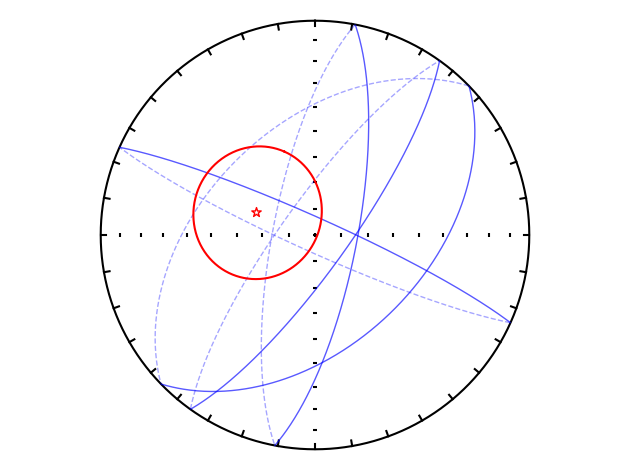

In [3]:
v3s = np.column_stack((v3_decs, v3_incs))
v3cars = pro.to_car(v3s)
gcpts = []
for v in v3cars:   # get points along the great circle
    gcars = pro.sample_gc(v, constraints=False)
    gdirs = pro.to_sph(gcars)
    gcpts.append(gdirs)

# calculate the intersection point
isec, mad, circ_pts = pro.gcfit(v3cars, normalize=True, constraints=False)
idir = pro.to_sph([isec])[0]

print (f"Intersection dec: {idir[0]:.2f}, inc: {idir[1]:.2f},  MAD: {mad:.2f}")

# plot
plo.plot_net()
for gc in gcpts:
    plo.plot_gc(dec=[x for x in gc[:,0]], inc=[x for x in gc[:,1]], color = 'blue', up_linestyle='--', up_alpha=0.35, dn_alpha=0.65)
plo.plot_di_mean(dec=idir[0], inc=idir[1], a95=mad, marker='*', markersize=50, color='red')

##### Estimate the Fisher mean from combined lines and planes (following McFadden and McElhinny, 1988)

Fisher mean with 4 lines and 4 planes, dec: 119.75, inc: 58.19,  a95: 12.05, k: 23.90


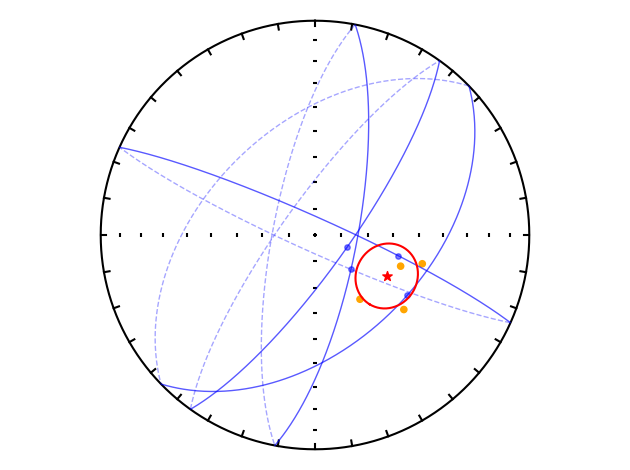

In [4]:
v1s = np.column_stack((v1_decs, v1_incs))

# calculate combined fisher mean
fmean, endpts = pro.iterative_fisher_mean(v1s, np.array(gcpts))

print (f"Fisher mean with {fmean['n']} lines and {fmean['m']} planes, dec: {fmean['dec']:.2f}, inc: {fmean['inc']:.2f},  a95: {fmean['alpha95']:.2f}, k: {fmean['k']:.2f}")

# plot
plo.plot_net()
plo.plot_di(dec=v1_decs, inc=v1_incs, marker='o', markersize=20, color='orange')
for i, gc in enumerate(gcpts):
    plo.plot_gc(dec=[x for x in gc[:,0]], inc=[x for x in gc[:,1]], color = 'blue', up_linestyle='--', up_alpha=0.35, dn_alpha=0.65)
    plo.plot_di(dec=endpts[i][0], inc=endpts[i][1], marker='o', markersize=15, color='blue', alpha=0.5)
plo.plot_di_mean(dec=fmean['dec'], inc=fmean['inc'], a95=fmean['alpha95'], marker='*', markersize=50, color='red')